In [1]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [2]:
#import the required libraries and modules
import pandas as pd
from data_loader import load_data
from visualization import plot_sales_distribution, plot_sales_over_time, plot_sales_by_store_type,calculate_promo_sales_summary,plot_bar_chart, plot_boxplot,get_numerical_features_present,calculate_correlation_matrix,generate_heatmap



In [3]:
# Load the data
train_data = load_data(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\processed\train_data.csv')
test_data = load_data(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\processed\test_data.csv')
store_data = load_data(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\processed\store_data.csv')



2025-01-06 17:24:35,118 - INFO - Setting visualization style.
2025-01-06 17:24:35,122 - INFO - Creating figure with subplots.
2025-01-06 17:24:35,544 - INFO - Plotting histogram of sales.
2025-01-06 17:24:37,816 - INFO - Plotting density plot of sales.
2025-01-06 17:25:04,697 - INFO - Displaying the plots.


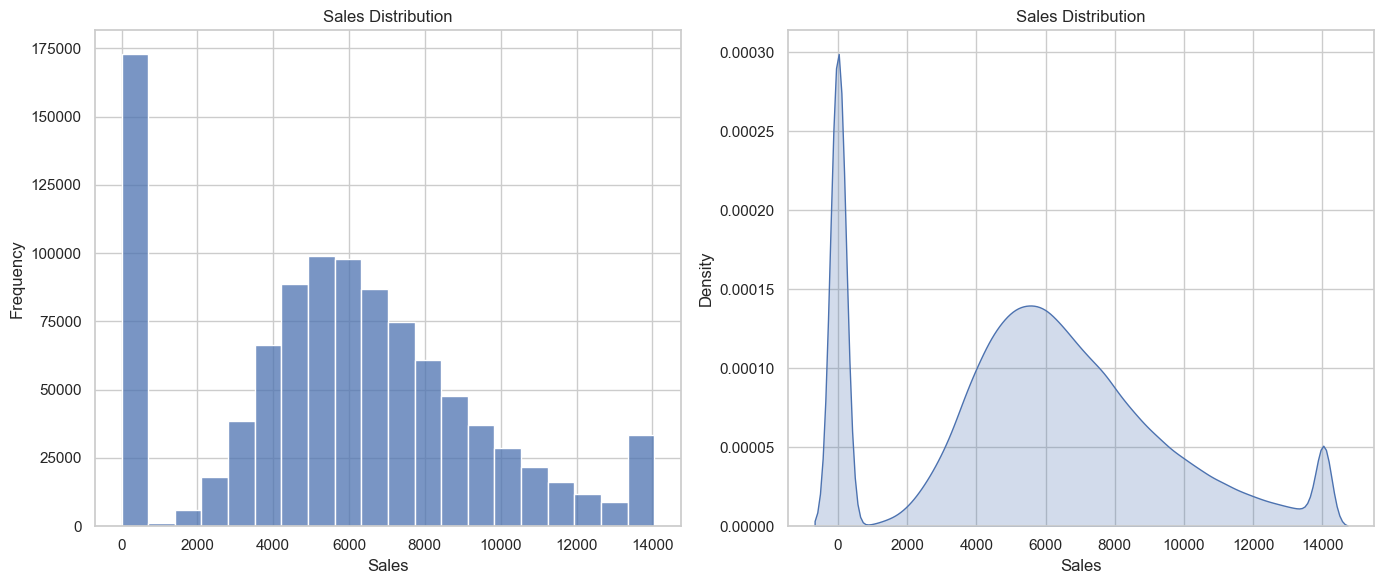

In [6]:
# Plot the sales distribution
plot_sales_distribution(train_data, hist_bins=20, hist_title='Sales Distribution', 
                        density_title='Sales Distribution', x_label='Sales')

2025-01-06 17:25:06,125 - INFO - Converting the date column to datetime format.
2025-01-06 17:25:06,521 - INFO - Grouping by date and calculating the mean sales.
2025-01-06 17:25:06,599 - INFO - Creating the plot.
2025-01-06 17:25:06,648 - INFO - Displaying the plot.
2025-01-06 17:25:06,652 - INFO - Time series plot for sales over time has been created.


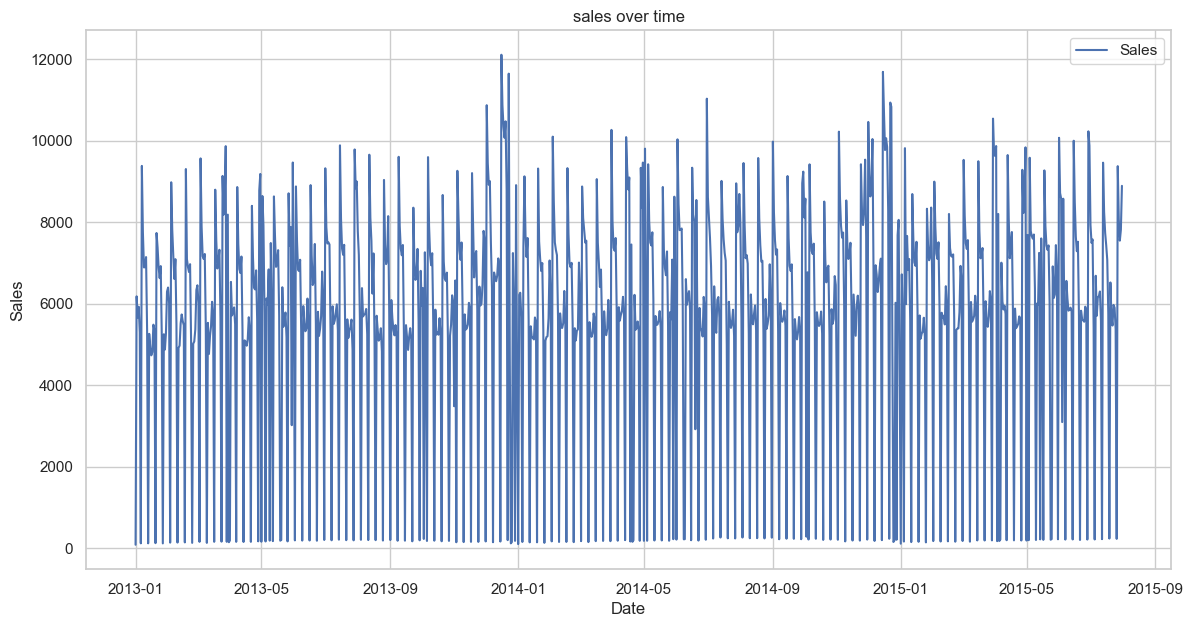

In [7]:

# sales over time
plot_sales_over_time(train_data, date_column='Date', sales_column='Sales', 
                     title='sales over time', x_label='Date', y_label='Sales')

2025-01-06 17:25:07,979 - INFO - Ensuring the store column in both dataframes has the same data type.
2025-01-06 17:25:08,006 - INFO - Merging train_data with store_data to get store types.
2025-01-06 17:25:08,329 - INFO - Plotting the sales distribution by store type.


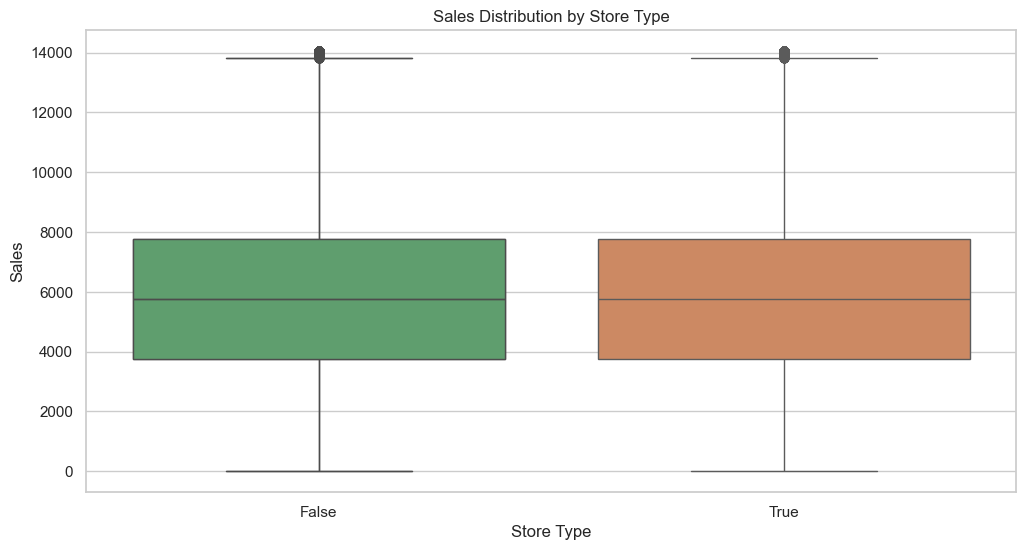

2025-01-06 17:25:11,239 - INFO - Time series plot for sales by store type has been created.


In [8]:
#sales by store type
plot_sales_by_store_type(train_data, store_data, store_column='Store', sales_column='Sales',
                         store_type_columns=['StoreType_b', 'StoreType_c', 'StoreType_d'])


Promo
-0.785400    4367.538696
 1.273237    7836.013738
Name: Sales, dtype: float64


2025-01-06 17:25:15,178 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
d:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\scripts\visualization.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Promo", y="Sales", data=data, palette="viridis")
2025-01-06 17:25:17,151 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


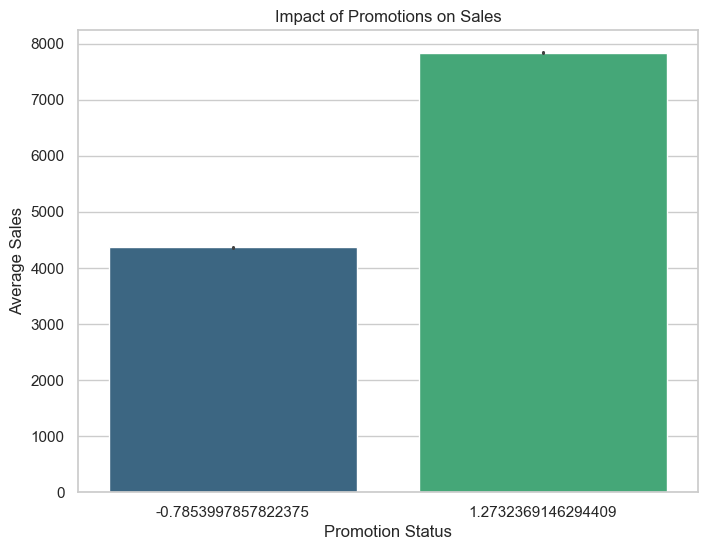

2025-01-06 17:27:22,240 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
d:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\scripts\visualization.py:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Promo", y="Sales", data=data, palette="viridis")
2025-01-06 17:27:29,931 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


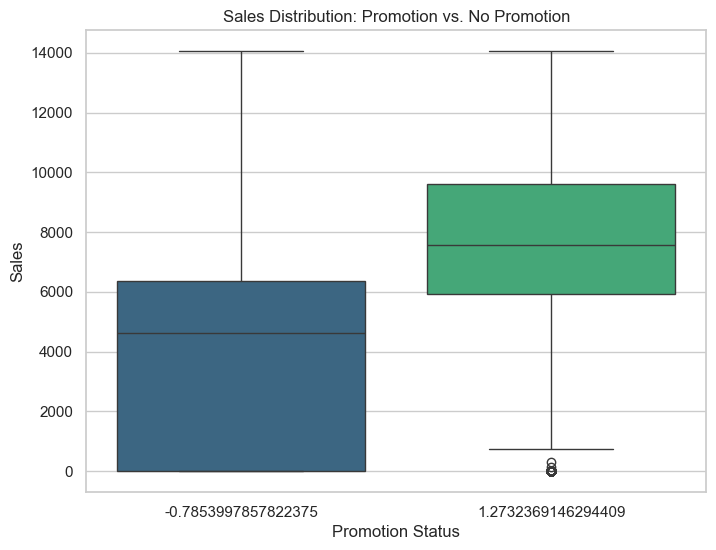

In [9]:
# promo sales summary
promo_sales_summary = calculate_promo_sales_summary(train_data)
print(promo_sales_summary)

plot_bar_chart(train_data)
plot_boxplot(train_data)


2025-01-06 17:27:32,841 - INFO - Converting the date column to datetime format.
2025-01-06 17:27:33,024 - INFO - Grouping by date and calculating the mean sales.
2025-01-06 17:27:33,139 - INFO - Creating the plot.
2025-01-06 17:27:33,336 - INFO - Displaying the plot.
2025-01-06 17:27:33,339 - INFO - Time series plot for sales over time has been created.


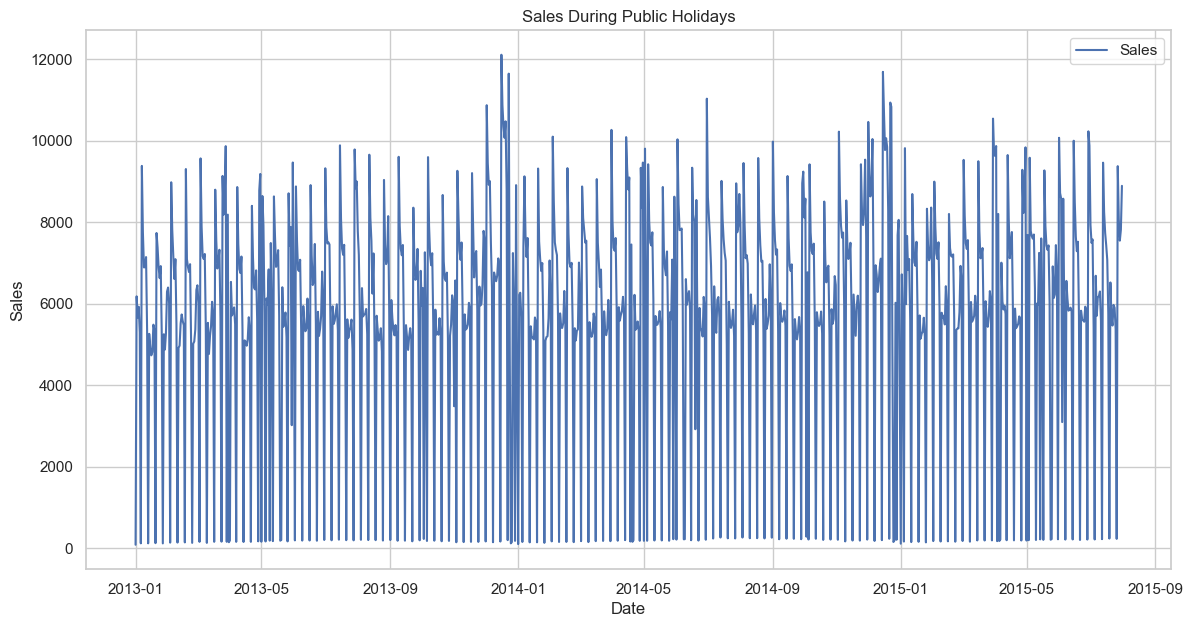

In [10]:
# Filter the data for public holidays
public_holidays_data = train_data[train_data['StateHoliday'] != '0']

# Plot sales over time during public holidays
plot_sales_over_time(public_holidays_data, date_column='Date', sales_column='Sales', 
                     title='Sales During Public Holidays', x_label='Date', y_label='Sales')

In [12]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,DaysSinceLastPromo
0,-1,4,2015-07-31,5263.0,555.0,0.452399,1.273237,-0.159217,2.144211,7,2015,0
1,-1,4,2015-07-31,6064.0,625.0,0.452399,1.273237,-0.159217,2.144211,7,2015,0
2,-1,4,2015-07-31,8314.0,821.0,0.452399,1.273237,-0.159217,2.144211,7,2015,0
3,-1,4,2015-07-31,13995.0,1485.0,0.452399,1.273237,-0.159217,2.144211,7,2015,0
4,-1,4,2015-07-31,4822.0,559.0,0.452399,1.273237,-0.159217,2.144211,7,2015,0


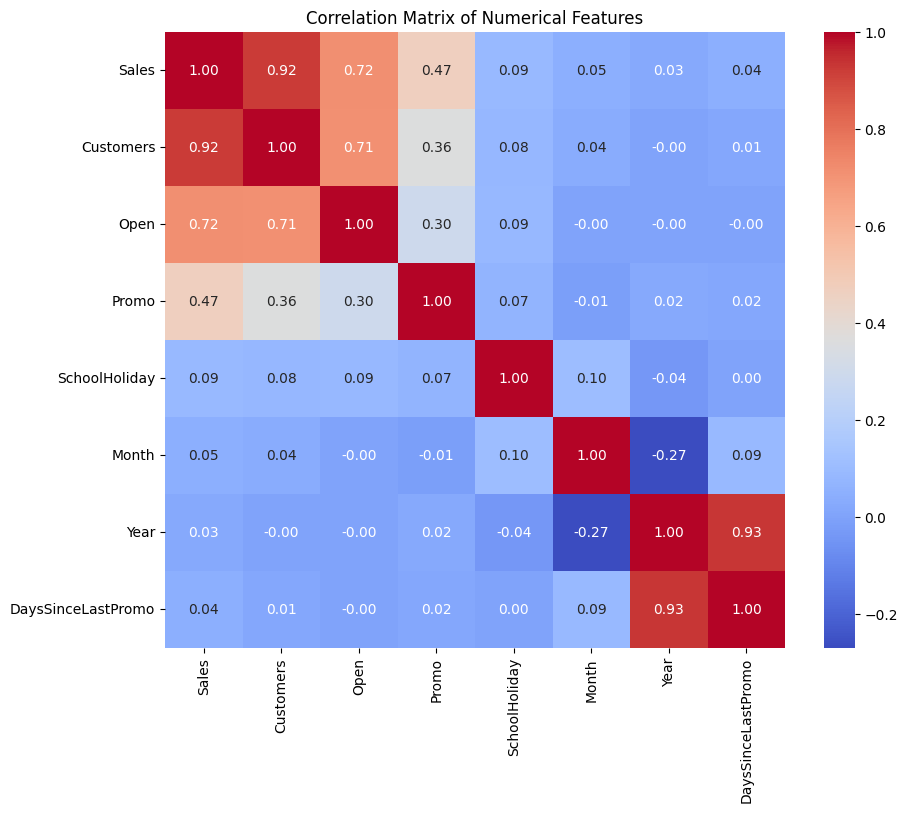

In [5]:

# Define numerical features 
numerical_features = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Month', 'Year', 'DaysSinceLastPromo']  
# Get the numerical features present in the data
numerical_features_present = get_numerical_features_present(numerical_features, train_data)
correlation_matrix = calculate_correlation_matrix(train_data, numerical_features_present)
generate_heatmap(correlation_matrix)
